In [ ]:
import py7zr
from py7zr import SevenZipFile


In [2]:
import py7zr
import chess.pgn
import psutil
from io import StringIO

def read_pgn_from_7z(archive_path, memory_limit_mb=1024):
    pgn_games = []
    
    with py7zr.SevenZipFile(archive_path, mode='r') as archive:
        # Extract files to a dictionary
        extracted_files = archive.read()
        
        for file_name, file_obj in extracted_files.items():
            if file_name.endswith('.pgn'):
                game_data = file_obj.read().decode('utf-8')
                pgn_games.append(game_data)
                
                # Print a portion of the PGN content to check what's inside
                print(f"Content of {file_name}:\n")
                print(game_data[:1000])  # Print first 1000 characters
                
                # Check memory usage
                process = psutil.Process()
                memory_usage_mb = process.memory_info().rss / (1024 * 1024)
                if memory_usage_mb > memory_limit_mb:
                    print(f"Memory usage exceeded {memory_limit_mb} MB. Stopping the process.")
                    break
    
    return pgn_games


In [3]:
archive_path = 'C:\\Users\\pc\\Desktop\\2024 q3 projects\\Lichess Elite Database.7z'
memory_limit_mb = 1024  # Set your memory limit here

pgn_data = read_pgn_from_7z(archive_path, memory_limit_mb=memory_limit_mb)

Content of Lichess Elite Database/lichess_elite_2013-09.pgn:

[Event "Rated Blitz game"]
[Date "????.??.??"]
[Round "?"]
[White "Matetricks"]
[Black "nicky"]
[Result "1-0"]
[WhiteTitle "NM"]
[WhiteElo "2471"]
[BlackElo "2211"]
[ECO "B01"]
[Opening "Scandinavian Defense: Main Line"]
[TimeControl "180+0"]
[UTCDate "2013.09.25"]
[UTCTime "00:38:04"]
[Termination "Normal"]
[WhiteRatingDiff "+7"]
[BlackRatingDiff "-6"]

1. e4 d5 2. exd5 Qxd5 3. Nc3 Qa5 4. d4 c6 5. Nf3 Nf6 6. Bc4 Bg4 7. h3 Bh5
8. O-O e6 9. g4 Nxg4 10. hxg4 Bxg4 11. Be2 Bd6 12. Ne4 Bc7 13. Nc5 Bd6 14.
Nxb7 Qc7 15. Nxd6+ Qxd6 16. Qd2 Bf5 17. c4 h5 18. Qf4 Qb4 19. d5 cxd5 20.
cxd5 Qxf4 21. Bxf4 exd5 22. Nd4 Bd7 23. Bf3 Na6 24. Rfe1+ Kf8 25. Bxd5 Re8
26. Bd6+ Kg8 27. Rxe8+ Bxe8 28. Re1 Kh7 29. Re7 1-0

[Event "Rated Blitz game"]
[Date "????.??.??"]
[Round "?"]
[White "nicky"]
[Black "Matetricks"]
[Result "0-1"]
[BlackTitle "NM"]
[WhiteElo "2217"]
[BlackElo "2464"]
[ECO "D01"]
[Opening "Richter-Veresov Attack"]
[TimeControl "180+

In [4]:
def parse_pgn_data(pgn_data, memory_limit_mb=1024):
    games = []
    for game_str in pgn_data:
        game_io = StringIO(game_str)
        while True:
            game = chess.pgn.read_game(game_io)
            if game is None:
                break
            games.append(game)
            
            # Check memory usage
            process = psutil.Process()
            memory_usage_mb = process.memory_info().rss / (1024 * 1024)
            if memory_usage_mb > memory_limit_mb:
                print(f"Memory usage exceeded {memory_limit_mb} MB. Stopping the process.")
                return games
    
    return games

In [5]:
games = parse_pgn_data(pgn_data, memory_limit_mb=memory_limit_mb)

Memory usage exceeded 1024 MB. Stopping the process.


In [6]:
def extract_features(game):
    board = game.board()
    moves = []
    for move in game.mainline_moves():
        board.push(move)
        moves.append(board.fen())
    return moves

In [7]:
dataset = [extract_features(game) for game in games]

In [8]:
dataset

[['rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1',
  'rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2',
  'rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR b KQkq - 0 2',
  'rnb1kbnr/ppp1pppp/8/3q4/8/8/PPPP1PPP/RNBQKBNR w KQkq - 0 3',
  'rnb1kbnr/ppp1pppp/8/3q4/8/2N5/PPPP1PPP/R1BQKBNR b KQkq - 1 3',
  'rnb1kbnr/ppp1pppp/8/q7/8/2N5/PPPP1PPP/R1BQKBNR w KQkq - 2 4',
  'rnb1kbnr/ppp1pppp/8/q7/3P4/2N5/PPP2PPP/R1BQKBNR b KQkq - 0 4',
  'rnb1kbnr/pp2pppp/2p5/q7/3P4/2N5/PPP2PPP/R1BQKBNR w KQkq - 0 5',
  'rnb1kbnr/pp2pppp/2p5/q7/3P4/2N2N2/PPP2PPP/R1BQKB1R b KQkq - 1 5',
  'rnb1kb1r/pp2pppp/2p2n2/q7/3P4/2N2N2/PPP2PPP/R1BQKB1R w KQkq - 2 6',
  'rnb1kb1r/pp2pppp/2p2n2/q7/2BP4/2N2N2/PPP2PPP/R1BQK2R b KQkq - 3 6',
  'rn2kb1r/pp2pppp/2p2n2/q7/2BP2b1/2N2N2/PPP2PPP/R1BQK2R w KQkq - 4 7',
  'rn2kb1r/pp2pppp/2p2n2/q7/2BP2b1/2N2N1P/PPP2PP1/R1BQK2R b KQkq - 0 7',
  'rn2kb1r/pp2pppp/2p2n2/q6b/2BP4/2N2N1P/PPP2PP1/R1BQK2R w KQkq - 1 8',
  'rn2kb1r/pp2pppp/2p2n2/q6b/2BP4/2N2N1P/PPP2PP1/R

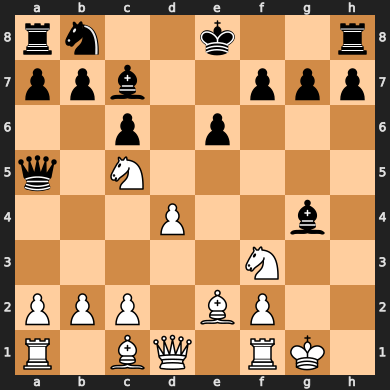

In [9]:
import chess
import chess.svg
from IPython.display import display, SVG

def display_fen(fen):
    board = chess.Board(fen)
    svg_board = chess.svg.board(board)
    display(SVG(svg_board))

# Example FEN string
fen_example = 'rn2k2r/ppb2ppp/2p1p3/q1N5/3P2b1/5N2/PPP1BP2/R1BQ1RK1 b kq - 5 13'
display_fen(fen_example)
